# Data Preprocessing:

In [215]:

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 

# Combine X and y into one DataFrame called 'data'
# Adding 'target' as a column to X
df = pd.concat([X, y], axis=1)

# Display the first few rows of the combined data
print("\nCombined Data: \n", df.head())

# Save the combined data to a CSV file for future analysis
df.to_csv('heart_disease_data.csv', index=False)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [216]:
# Convert valuesof target variables to binary
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

# Check the new binary column
print(df[['num', 'num']].head())

   num  num
0    0    0
1    1    1
2    1    1
3    0    0
4    0    0



# Loading all modules

In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Checking Data Description

In [218]:
print(X.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   num     303 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB
None


# Missing Values Count

In [219]:
#missing Value
print(df.isnull().sum())

# Check data types
print(df.dtypes)


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
num           int64
dtype: object


In [220]:
df = df.fillna(df.mean())

In [221]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [222]:
df['sex'] = df['sex'].astype(int)
df['cp'] = df['cp'].astype(int)
df['fbs'] = df['fbs'].astype(int)
df['restecg'] = df['restecg'].astype(int)
df['exang'] = df['exang'].astype(int)
df['slope'] = df['slope'].astype(int)
df['ca'] = df['ca'].astype(int)
df['thal'] = df['thal'].astype(int)
df['num'] = df['num'].astype(int)

# Standardization

In [223]:
# Select numeric columns
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numeric features
df[numeric_features] = scaler.fit_transform(df[numeric_features])

print(df.head())

        age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.948726    1   1  0.757525 -0.264900    1        2  0.017197      0   
1  1.392002    1   4  1.611220  0.760415    0        2 -1.821905      1   
2  1.392002    1   4 -0.665300 -0.342283    0        2 -0.902354      1   
3 -1.932564    1   3 -0.096170  0.063974    0        0  1.637359      0   
4 -1.489288    0   2 -0.096170 -0.825922    0        2  0.980537      0   

    oldpeak  slope  ca  thal  num  
0  1.087338      3   0     6    0  
1  0.397182      2   3     3    1  
2  1.346147      2   2     7    1  
3  2.122573      3   0     3    0  
4  0.310912      1   0     3    0  


# Exploratory Data Analysis

In [224]:
# Set up the matplotlib figure
plt.figure(figsize=(30, 20))

<Figure size 3000x2000 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

C:\Users\bidault\AppData\Local\Temp\ipykernel_3304\3338123166.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\bidault\AppData\Local\Temp\ipykernel_3304\3338123166.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\bidault\AppData\Local\Temp\ipykernel_3304\3338123166.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\bidault\AppData\Local\Temp\ipykernel_3304\3338123166.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\bidault\AppData\Local\Temp\ipykernel_3304\3338123166.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\bidault\AppData\Local\Temp\ipykernel_3304\3338123166.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\bidault\AppData\Local\Temp\ipykernel_3304\3338123166.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\bida

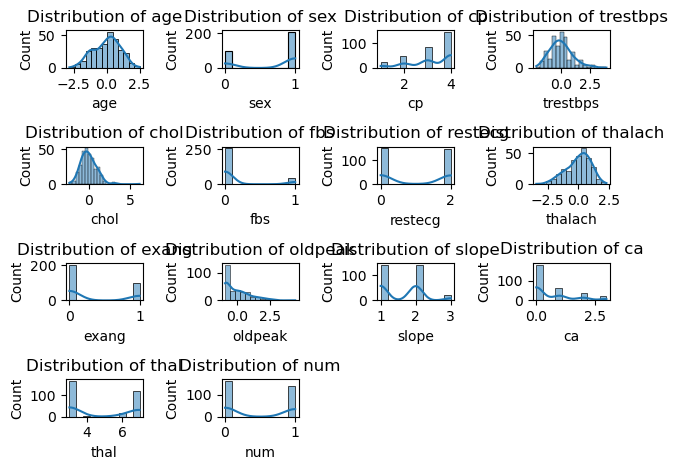

In [225]:
for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()

plt.show()


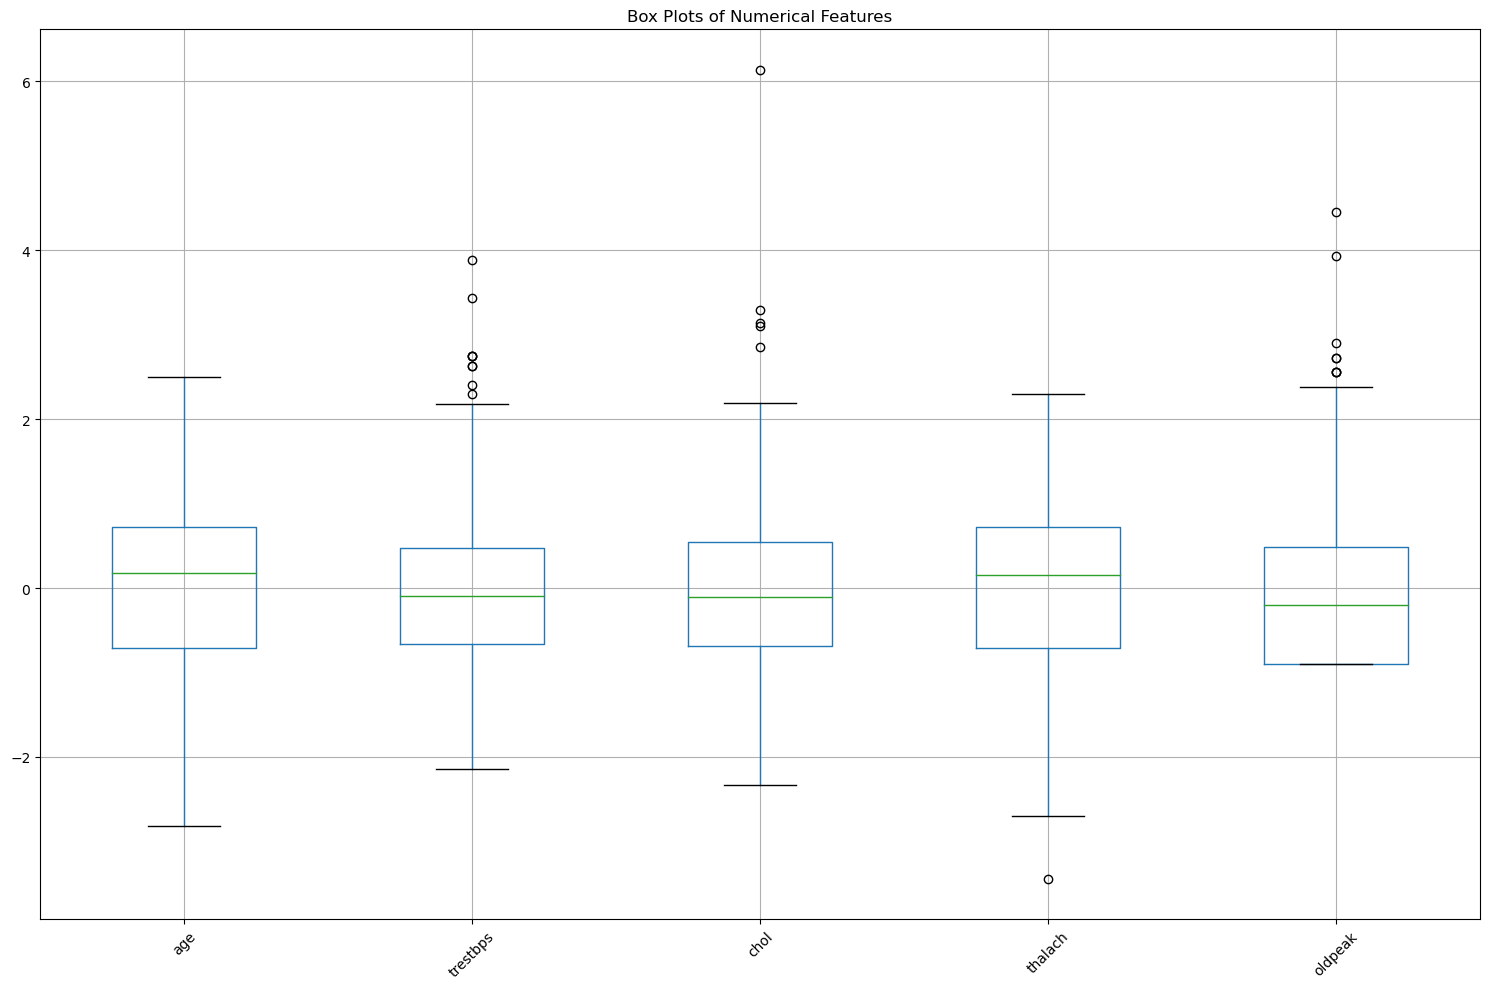

In [179]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))
df[numerical_features].boxplot()
plt.title('Box Plots of Numerical Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

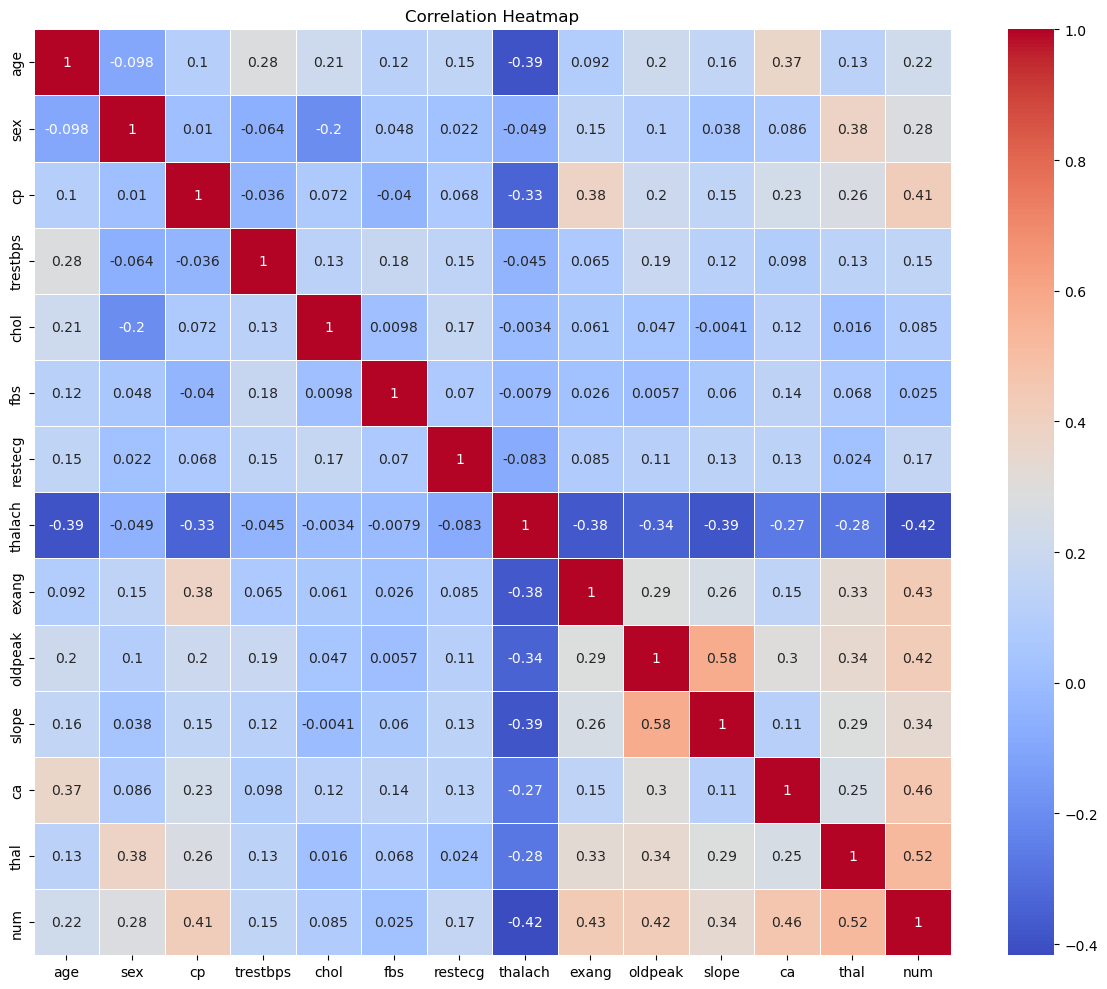

In [228]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


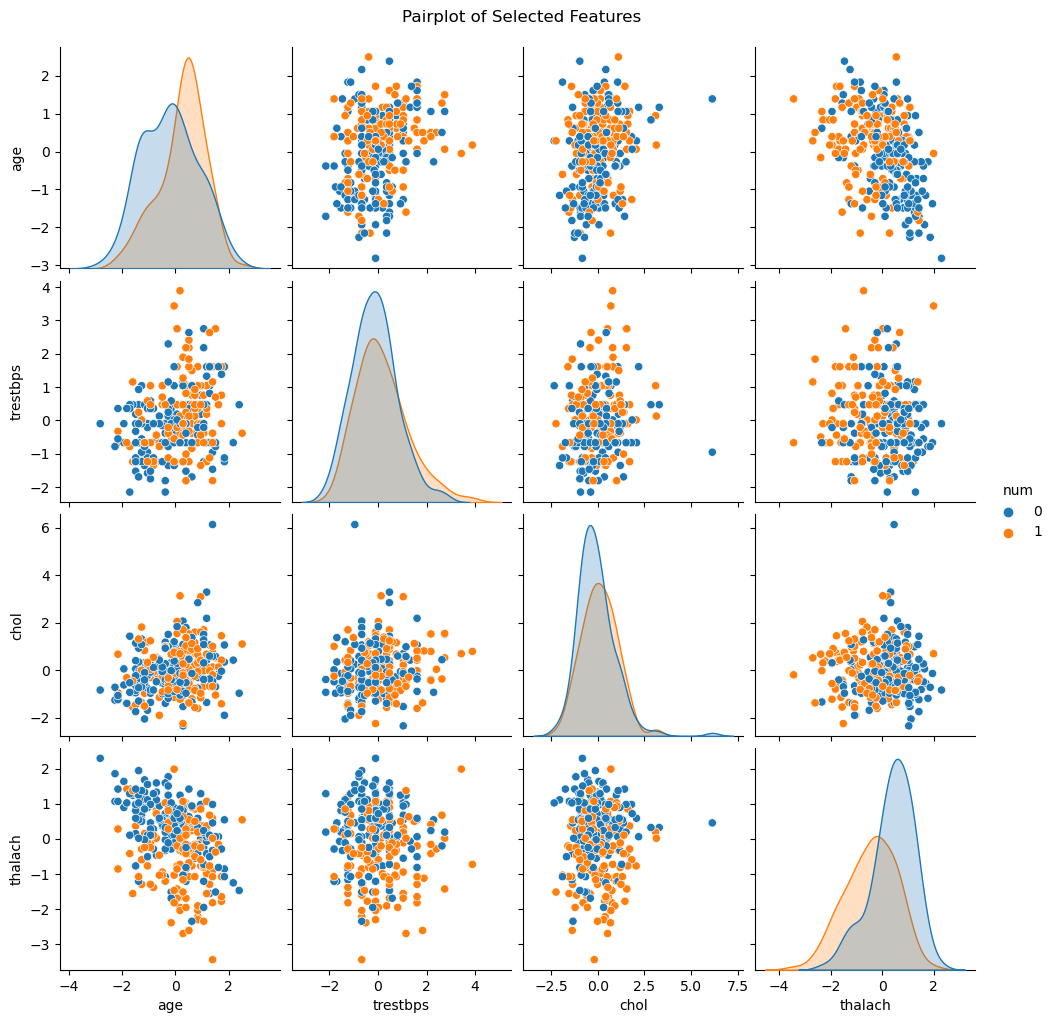

       age                                                              \
     count      mean       std       min       25%       50%       75%   
num                                                                      
0    164.0 -0.205411  1.054104 -2.819115 -1.073718 -0.270281  0.505451   
1    139.0  0.242356  0.879726 -2.154202 -0.270281  0.394632  0.837908   

                 sex            ...   ca        thal                           \
          max  count      mean  ...  75%  max  count      mean       std  min   
num                             ...                                             
0    2.389372  164.0  0.560976  ...  0.0  3.0  164.0  3.798780  1.563306  3.0   
1    2.500191  139.0  0.820144  ...  2.0  3.0  139.0  5.827338  1.748407  3.0   

                         
     25%  50%  75%  max  
num                      
0    3.0  3.0  3.0  7.0  
1    3.0  7.0  7.0  7.0  

[2 rows x 104 columns]


In [229]:
 # Assuming df is the DataFrame that contains the heart disease dataset
selected_features = ['age', 'trestbps', 'chol', 'thalach', 'num']

# Pairplot to visualize relationships between selected features
sns.pairplot(df[selected_features], hue='num')
plt.suptitle('Pairplot of Selected Features', y=1.02)  # Adjust title position slightly above the plot
plt.show()

# Print summary statistics grouped by the 'target' variable
print(df.groupby('num').describe())

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


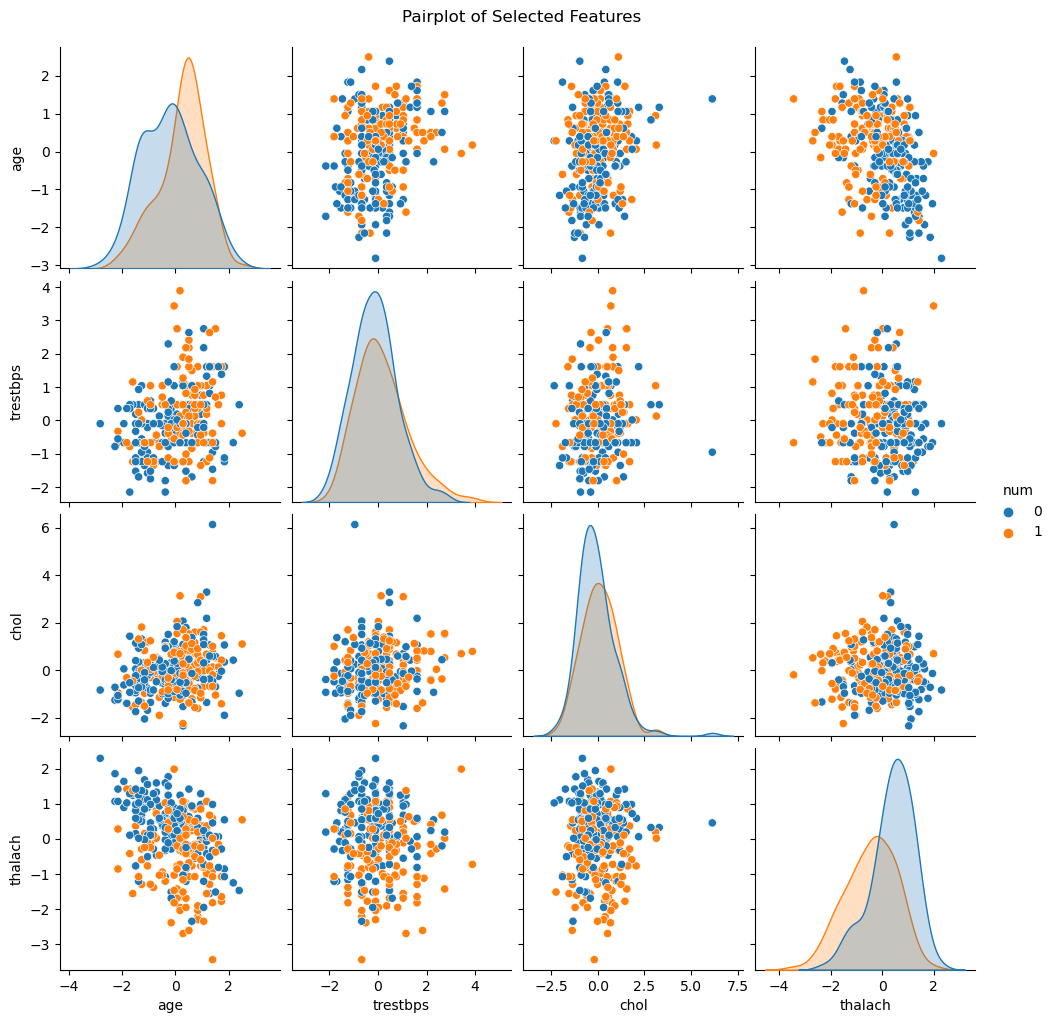

       age                                                              \
     count      mean       std       min       25%       50%       75%   
num                                                                      
0    164.0 -0.205411  1.054104 -2.819115 -1.073718 -0.270281  0.505451   
1    139.0  0.242356  0.879726 -2.154202 -0.270281  0.394632  0.837908   

                 sex            ...   ca        thal                           \
          max  count      mean  ...  75%  max  count      mean       std  min   
num                             ...                                             
0    2.389372  164.0  0.560976  ...  0.0  3.0  164.0  3.798780  1.563306  3.0   
1    2.500191  139.0  0.820144  ...  2.0  3.0  139.0  5.827338  1.748407  3.0   

                         
     25%  50%  75%  max  
num                      
0    3.0  3.0  3.0  7.0  
1    3.0  7.0  7.0  7.0  

[2 rows x 104 columns]


C:\Users\bidault\AppData\Local\Temp\ipykernel_3304\3138860101.py:19: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\bidault\AppData\Local\Temp\ipykernel_3304\3138860101.py:19: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\bidault\AppData\Local\Temp\ipykernel_3304\3138860101.py:19: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\bidault\AppData\Local\Temp\ipykernel_3304\3138860101.py:19: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\bidault\AppData\Local\Temp\ipykernel_3304\3138860101.py:19: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\bidault\AppData\Local\Temp\ipykernel_3304\3138860101.py:19: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\bidault\AppData\Local\Temp\ipykernel_3304\3138860101.py:19: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<function matplotlib.pyplot.show(close=None, block=None)>

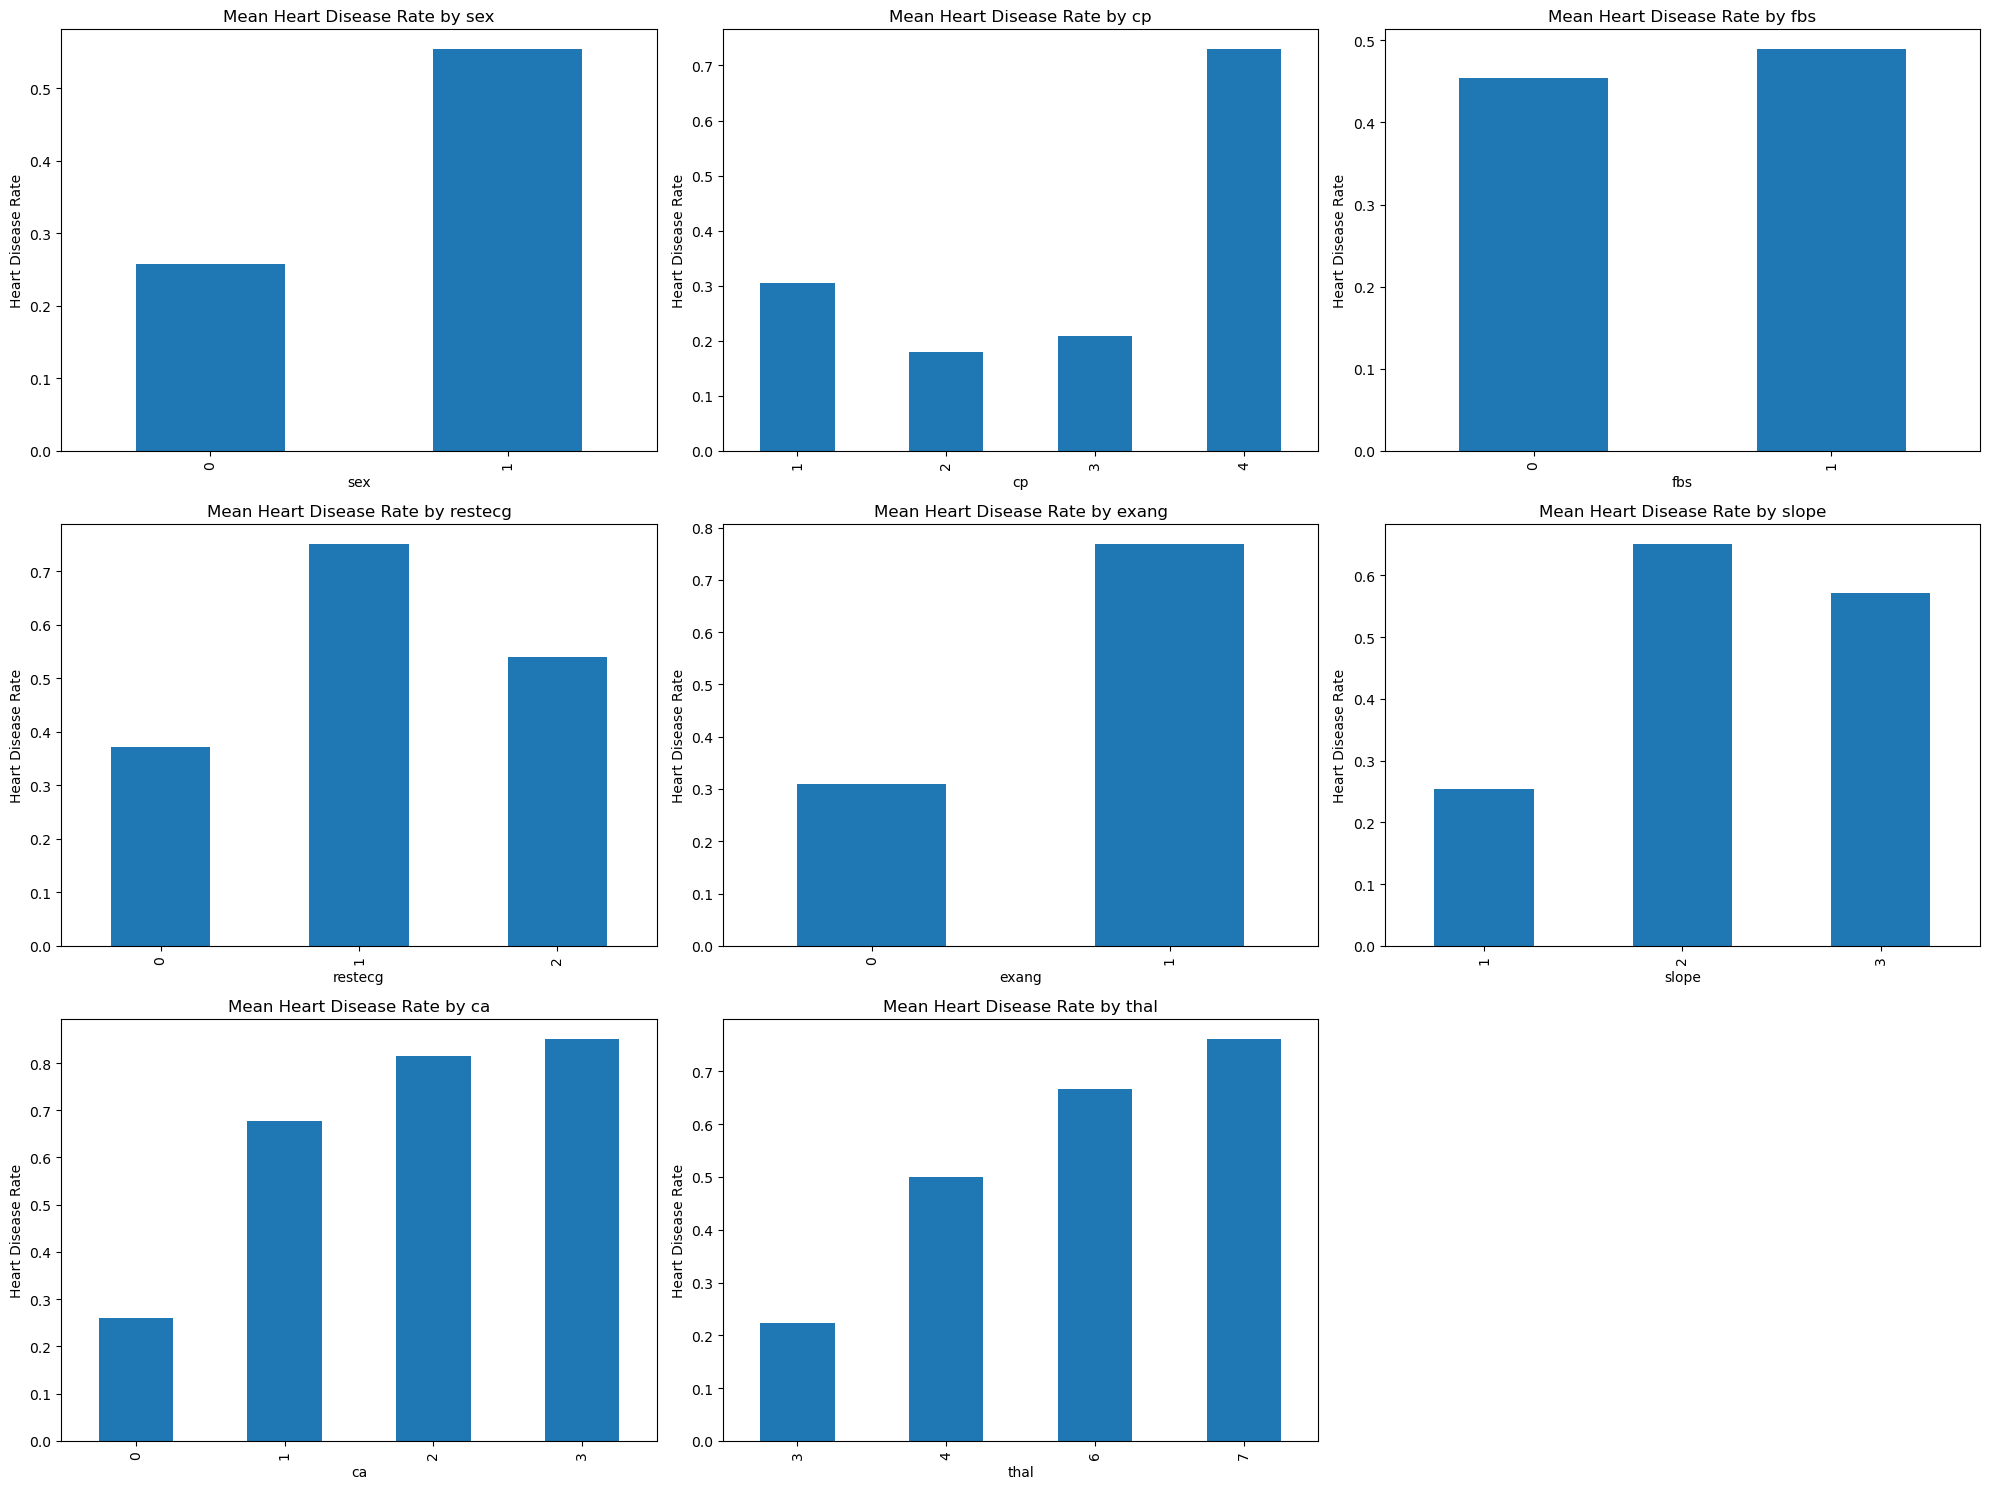

In [230]:
# Additional analysis: Pairplot for selected features
selected_features = ['age', 'trestbps', 'chol', 'thalach', 'num']
sns.pairplot(df[selected_features], hue='num')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

# Print summary statistics
print(df.groupby('num').describe())

# Analyze the relationship between categorical variables and the target
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

plt.figure(figsize=(20, 15))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    df.groupby(feature)['num'].mean().plot(kind='bar')
    plt.title(f'Mean Heart Disease Rate by {feature}')
    plt.ylabel('Heart Disease Rate')
    plt.tight_layout()

plt.show

# Feature Engineering

In [234]:
df['age_category'] = pd.cut(df['age'], bins=[0, 40, 60, 80, 100], labels=['Young', 'Middle', 'Senior', 'Elderly'])

# Create cholesterol level categories
df['chol_category'] = pd.cut(df['chol'], bins=[0, 200, 240, 1000], labels=['Normal', 'Borderline High', 'High'])

# Create blood pressure categories
df['bp_category'] = pd.cut(df['trestbps'], bins=[0, 120, 140, 300], labels=['Normal', 'Prehypertension', 'Hypertension'])
print(df.head(5))

        age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.948726    1   1  0.757525 -0.264900    1        2  0.017197      0   
1  1.392002    1   4  1.611220  0.760415    0        2 -1.821905      1   
2  1.392002    1   4 -0.665300 -0.342283    0        2 -0.902354      1   
3 -1.932564    1   3 -0.096170  0.063974    0        0  1.637359      0   
4 -1.489288    0   2 -0.096170 -0.825922    0        2  0.980537      0   

    oldpeak  slope  ca  thal  num age_category chol_category bp_category  
0  1.087338      3   0     6    0        Young           NaN      Normal  
1  0.397182      2   3     3    1        Young        Normal      Normal  
2  1.346147      2   2     7    1        Young           NaN         NaN  
3  2.122573      3   0     3    0          NaN        Normal         NaN  
4  0.310912      1   0     3    0          NaN           NaN         NaN  


In [235]:
X = df.drop(['num', 'age_category', 'chol_category', 'bp_category'], axis=1)
y = df['num']


Selected Features by RFE: Index(['sex', 'cp', 'exang', 'slope', 'ca'], dtype='object')


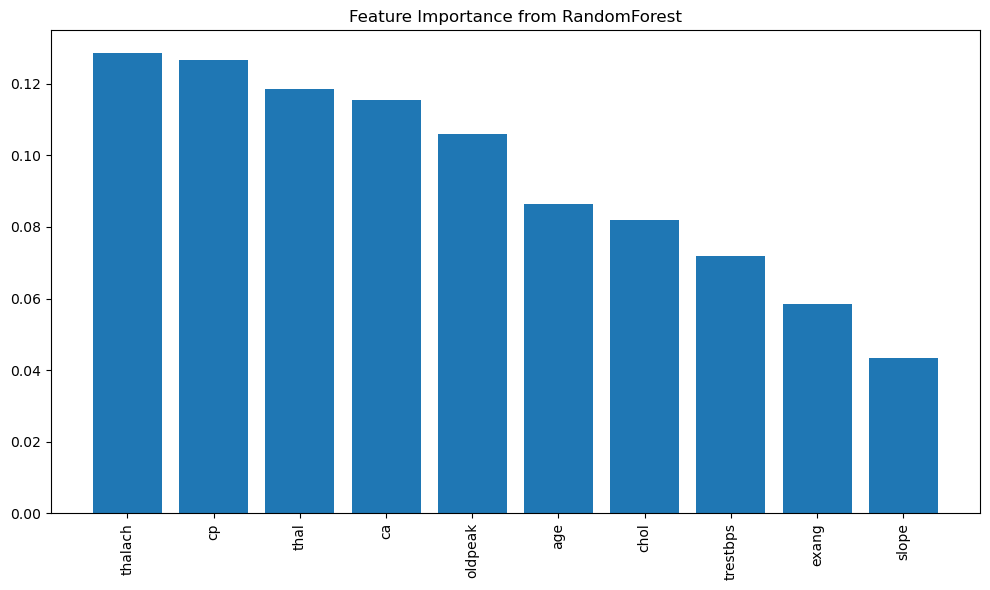


Top 10 Most Important Features from RandomForest:
 Index(['thalach', 'cp', 'thal', 'ca', 'oldpeak', 'age', 'chol', 'trestbps',
       'exang', 'slope'],
      dtype='object')


In [236]:
# Convert categorical features into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# a. Recursive Feature Elimination (RFE) using Logistic Regression
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=5)  # Select the top 5 features
rfe.fit(X, y)

# Print the selected features by RFE
selected_rfe_features = X.columns[rfe.support_]
print("\nSelected Features by RFE:", selected_rfe_features)

# b. Feature Importance using RandomForest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Get feature importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort in descending order

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
plt.title('Feature Importance from RandomForest')
plt.bar(range(10), importances[indices][:10], align='center')
plt.xticks(range(10), X.columns[indices][:10], rotation=90)
plt.tight_layout()
plt.show()

# Print the top 10 most important features
print("\nTop 10 Most Important Features from RandomForest:\n", X.columns[indices][:10])

# Model Selection and Training

In [237]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# List of models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42)
}


In [238]:
### Step 1: Train the models and use cross-validation
# K-Fold Cross-Validation setup
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = {}
for name, model in models.items():
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results[name] = cv_results
    print(f"{name}: Mean CV Accuracy = {cv_results.mean():.4f}, Std = {cv_results.std():.4f}")


Logistic Regression: Mean CV Accuracy = 0.8305, Std = 0.0304
Decision Tree: Mean CV Accuracy = 0.7313, Std = 0.0377
Random Forest: Mean CV Accuracy = 0.7974, Std = 0.0280


# Model Evaluation

In [239]:
# Accuracy, precision, recall, F1-score, and ROC-AUC
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
    
metrics[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    }
    # Print classification report
print(classification_report(y_test, y_pred))
print(f"\n{name} Classification Report:\n")
    

# Display metrics comparison
metrics_df = pd.DataFrame(metrics).T
print("\nModel Performance Comparison:")
print(metrics_df)


              precision    recall  f1-score   support

           0       0.93      0.85      0.89        33
           1       0.84      0.93      0.88        28

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61


Random Forest Classification Report:


Model Performance Comparison:
                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression  0.868852   0.812500  0.928571  0.866667  0.873377
Decision Tree        0.737705   0.676471  0.821429  0.741935  0.744048
Random Forest        0.885246   0.838710  0.928571  0.881356  0.888528


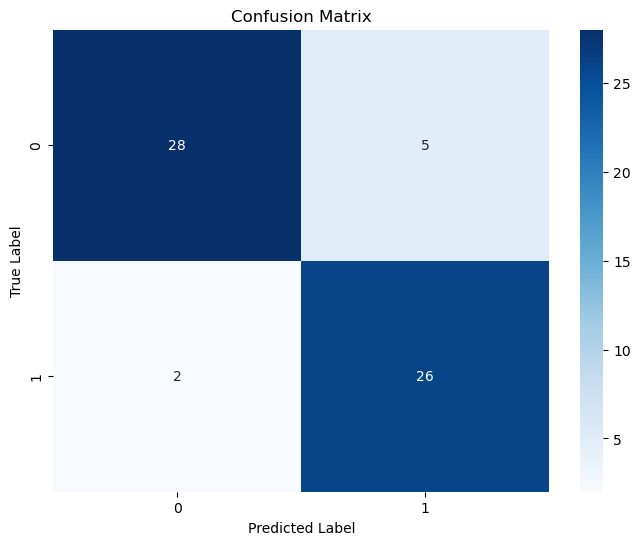

Evaluation for Logistic Regression:
Accuracy: 0.8689
Precision: 0.8125
Recall: 0.9286
F1-score: 0.8667
ROC-AUC: 0.9502


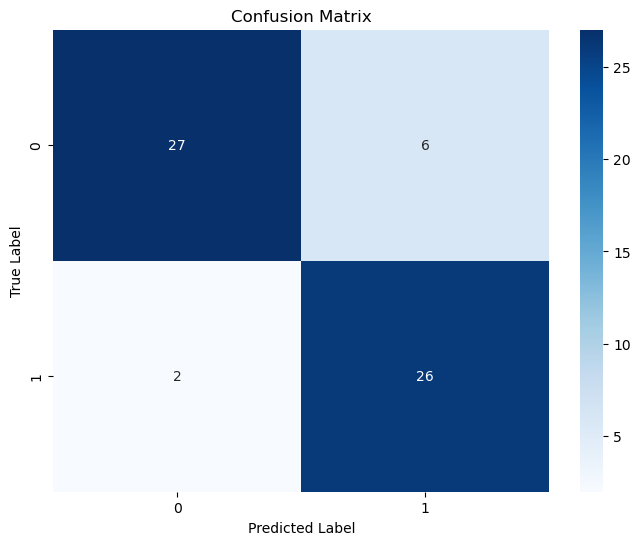



Evaluation for Decision Tree:
Accuracy: 0.7377
Precision: 0.6765
Recall: 0.8214
F1-score: 0.7419
ROC-AUC: 0.7440


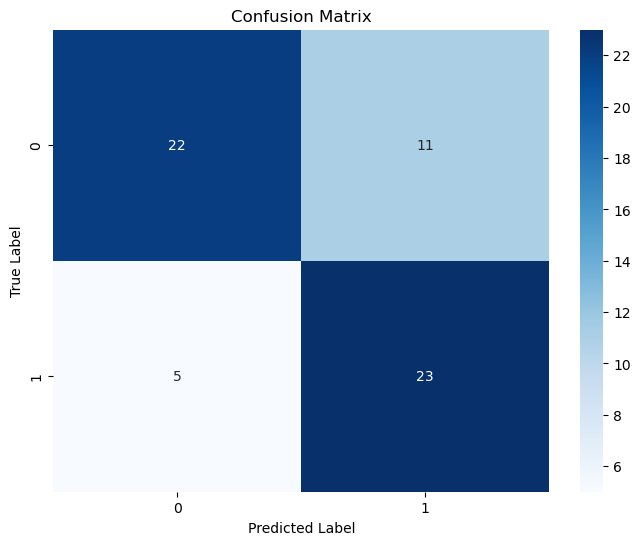



Evaluation for Random Forest:
Accuracy: 0.8852
Precision: 0.8387
Recall: 0.9286
F1-score: 0.8814
ROC-AUC: 0.9513


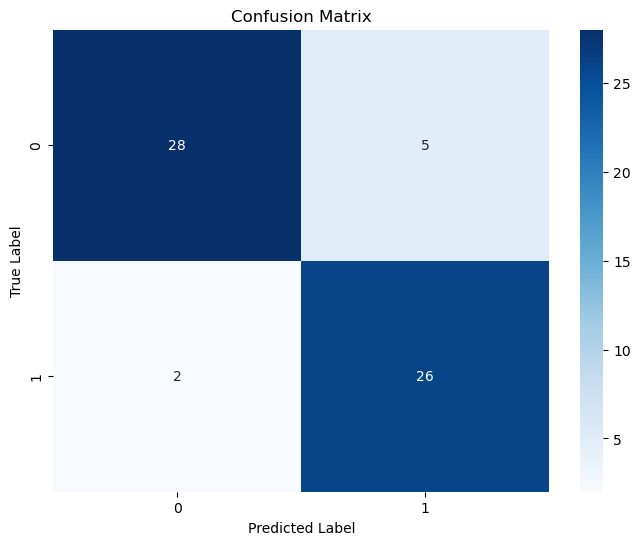

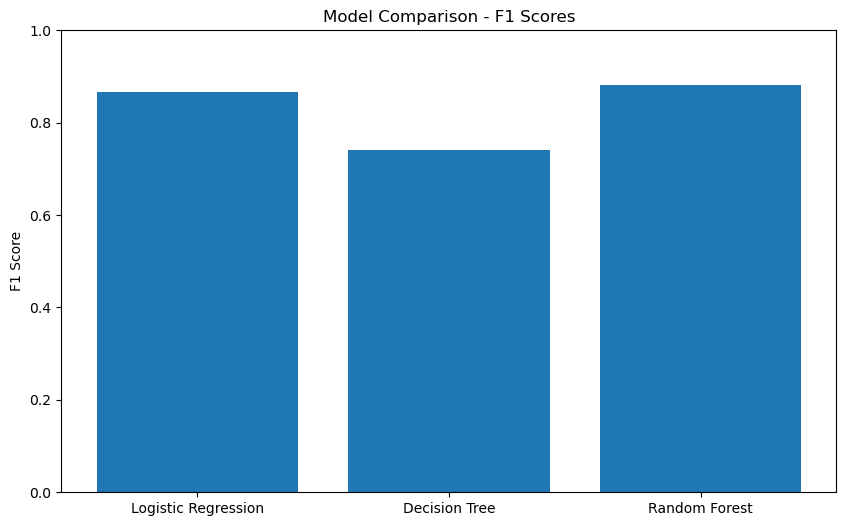

In [212]:
 # Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()   

# Evaluate each model
for name, model in models.items():
    print(f"Evaluation for {name}:")
    evaluate_model(model, X_test, y_test)
    print("\n")

# Compare model performances
model_scores = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    model_scores[name] = f1_score(y_test, y_pred)

plt.figure(figsize=(10, 6))
plt.bar(model_scores.keys(), model_scores.values())
plt.title('Model Comparison - F1 Scores')
plt.ylabel('F1 Score')
plt.ylim(0, 1)
plt.show()